# Benford  for Python -  IP addresses  UNDER DEVELOPMENT

### Current version: 0.1.0.3

# IP Test Case

### Benford for python is a Package in PyPi (as of December 2017). I discovered this package and on Milcent's github page https://github.com/milcent/benford_py and wanted to run a test on some IP addresses.


### I chose to use census data as it is known to be a Benford compliant dataset.  Briefly, Benford's Law deals with the  the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digits are not evenly distributed.

### For example, in sets that obey the law, the number 1 appears as the most significant digit about 30% of the time, while 9 appears as the most significant digit less than 5% of the time. By contrast, if the digits were distributed uniformly, they would each occur about 11.1% of the time (Wikipedia).    

### Benford's law is often used in forensic accounting to detect fraud and other anomalies, see (Mark Nigrini and Joseph T. Wells 'Benford's Law: Applications for Forensic Accounting, Auditing and  Fraud Detection)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
import benford as bf
import os

### Load the Data

In [16]:
good_ips = pd.read_csv('good_ips_index.csv',
                       encoding='latin-1',
                       index_col="Record")

In [12]:
good_ips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9867 entries, 1 to 9867
Data columns (total 2 columns):
Server Address    9867 non-null object
first             9867 non-null int64
dtypes: int64(1), object(1)
memory usage: 231.3+ KB


#### The dataframe contains and index column (Record), Server Address and a column with the first digit.  

In [13]:
good_ips.head()

,Server Address,first
Record,,
1,34.239.253.124,3
2,151.101.64.70,1
3,151.101.64.70,1
4,173.194.78.189,1
5,172.217.6.142,1


#### There are  9,867 addresses

### First Digits Test

### Let us see if the IP data conforms to Benford's Law 

## Please see error below, I've tried to pass an index parameter in the bf.first_digits function but it does not accept it.

### It's something with the constructor of the DataFrame inside pandas that the function calls. I found it very weird, since there is no way we could be using a *scalar* value.

### First, I forgot the `first` column and converted the `Server Address` column into ints after removing all the IPs '.'. 

In [6]:
good_ips['ip_numbers'] = good_ips['Server Address'].str.replace('.','').astype(int)
good_ips.head()

,Server Address,first,ip_numbers
Record,,,
1,34.239.253.124,3,34239253124
2,151.101.64.70,1,1511016470
3,151.101.64.70,1,1511016470
4,173.194.78.189,1,17319478189
5,172.217.6.142,1,1722176142


### Then I ran the function on it.

Initialized sequence with 9867 registries.

Test performed on 9867 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant deviations are:

             Expected     Found     Z_score
First_1_Dig                                
1            0.301030  0.899868  129.667516
2            0.176091  0.027972   38.614192
3            0.124939  0.006284   35.630828
4            0.096910  0.000101   32.488493
6            0.066947  0.001926   25.822050
7            0.057992  0.001419   24.021605
8            0.051153  0.001419   22.401054
9            0.045757  0.000507   21.486776
5            0.079181  0.060505    6.851894


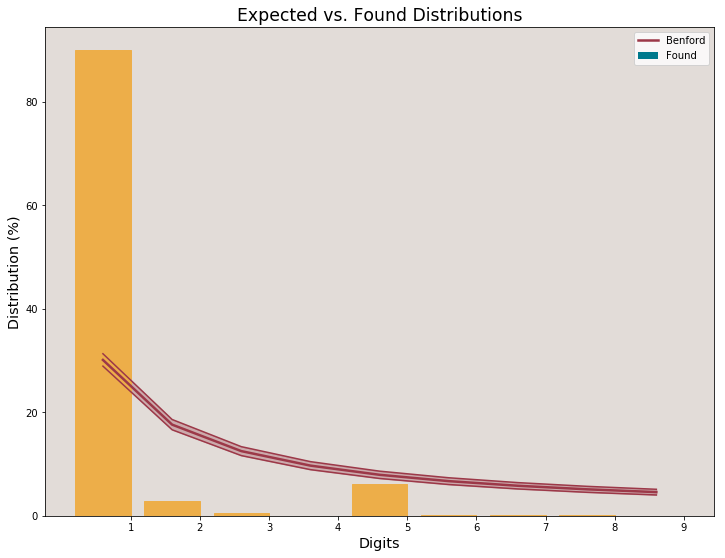

In [7]:
ips_first = bf.first_digits(good_ips.ip_numbers, digs=1, decimals=0, confidence=99, high_Z='all') 

### Everything went fine, except for the non-compliant dataset :)

### But it still doesn't explain why the other column wouldn't work. So I thought, maybe pandas was getting confused when you called `good_ips.first` and throwing a scalar value of some sort. Indeed, when I called it like that bellow, surprise(!), it is already a DataFrame method (somethign to handle initial periods of time series), which means that to use it like that you would have to change the column name.

In [22]:
good_ips.first?

Signature: good_ips.first(offset)
Docstring:
Convenience method for subsetting initial periods of time series data
based on a date offset.

Parameters
----------
offset : string, DateOffset, dateutil.relativedelta

Examples
--------
ts.first('10D') -> First 10 days

Returns
-------
subset : type of caller
File:      ~/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py
Type:      method


### Or use the ['`column`'] notation, like bellow, which rendered the same result.

Initialized sequence with 9867 registries.

Test performed on 9867 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant deviations are:

             Expected     Found     Z_score
First_1_Dig                                
1            0.301030  0.899868  129.667516
2            0.176091  0.027972   38.614192
3            0.124939  0.006284   35.630828
4            0.096910  0.000101   32.488493
6            0.066947  0.001926   25.822050
7            0.057992  0.001419   24.021605
8            0.051153  0.001419   22.401054
9            0.045757  0.000507   21.486776
5            0.079181  0.060505    6.851894


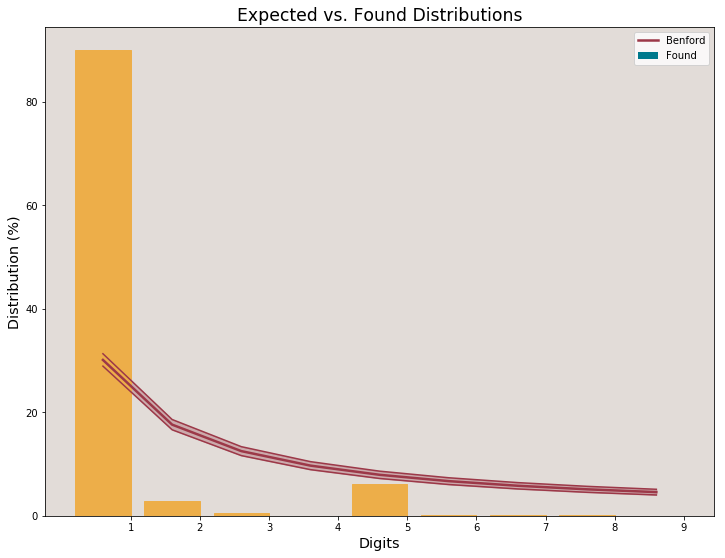

In [8]:
ips_scalar = bf.first_digits(good_ips['first'], digs=1, decimals=0, confidence=99, high_Z='all')

### Hope it helped!